In [2]:
import pandas as pd
from scipy.io import loadmat
import numpy as np
from pathlib import Path

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
pd.options.display.max_rows = 10
pd.options.display.max_columns = 100

Data is provided in matlab files .mat

They are deeply nested structures that contain data and metadata about the whole mast. Have to suss all this out...

In [4]:
small = Path('../data/raw/03_03_2019_11_00_00_000.mat') # small file, 1.0 MB
small.exists()

True

In [5]:
medium = Path('../data/raw/06_18_2019_08_00_00_000.mat') # medium file, 3.8 MB
medium.exists()

True

In [94]:
dfb = loadmat(small, squeeze_me=True)

In [95]:
top_keys = {key : dfb[key].dtype.names for key in dfb.keys() if not key.startswith('__')}
top_keys

{'Sonic_x_119': ('val', 'label', 'units', 'height'),
 'Sonic_y_119': ('val', 'label', 'units', 'height'),
 'Sonic_z_119': ('val', 'label', 'units', 'height'),
 'Sonic_Temp_119': ('val', 'label', 'units', 'height'),
 'Sonic_x_100': ('val', 'label', 'units', 'height'),
 'Sonic_y_100': ('val', 'label', 'units', 'height'),
 'Sonic_z_100': ('val', 'label', 'units', 'height'),
 'Sonic_Temp_100': ('val', 'label', 'units', 'height'),
 'Sonic_x_74': ('val', 'label', 'units', 'height'),
 'Sonic_y_74': ('val', 'label', 'units', 'height'),
 'Sonic_z_74': ('val', 'label', 'units', 'height'),
 'Sonic_Temp_74': ('val', 'label', 'units', 'height'),
 'Sonic_x_61': ('val', 'label', 'units', 'height'),
 'Sonic_y_61': ('val', 'label', 'units', 'height'),
 'Sonic_z_61': ('val', 'label', 'units', 'height'),
 'Sonic_Temp_61': ('val', 'label', 'units', 'height'),
 'Sonic_x_41': ('val', 'label', 'units', 'height'),
 'Sonic_y_41': ('val', 'label', 'units', 'height'),
 'Sonic_z_41': ('val', 'label', 'units', 'he

In [96]:
dfb['Sonic_x_119']

array((array([-62.43, -62.49, -62.35, ..., -48.81, -48.95,  99.99]), 'Sonic x velocity (119 m)', 'm/s', 119),
      dtype=[('val', 'O'), ('label', 'O'), ('units', 'O'), ('height', 'O')])

In [97]:
dfb['Sonic_x_119']['val'].item().shape

(12000,)

In [98]:
channel_meta = pd.DataFrame({key: [dfb[key][val_i].item() for val_i in val if val_i != 'val'] for key, val in top_keys.items() if key not in {'tower', 'datastream'}},
                           index=['label', 'units', 'height']).T
channel_meta

,label,units,height
Sonic_x_119,Sonic x velocity (119 m),m/s,119
Sonic_y_119,Sonic y velocity (119 m),m/s,119
Sonic_z_119,Sonic z velocity (119 m),m/s,119
Sonic_Temp_119,Sonic temperature (119 m),°C,119
Sonic_x_100,Sonic x velocity (100 m),m/s,100
...,...,...,...
Sonic_dt_rotated_15m,Sonic dt rotated (15 m),s,15
Sonic_u_15m,Sonic u (15 m),m/s,15
Sonic_v_15m,Sonic v (15 m),m/s,15
Sonic_w_15m,Sonic w (15 m),m/s,15


Three sub types: 'config', 'instrument', 'qc'

In [99]:
dfb['datastream'][0].size > 0

False

In [100]:
dfb['datastream'][-1]['instrument']

array(array((array([2011,    4,    1,    0,    0,    0], dtype=uint16), 'XXXXXXXXX', 'Aspirator on', 'Asp_3', 'ASP_STAT_3m', 'Aspirator', 'TF', -99999, 20),
      dtype=[('installdate', 'O'), ('serialno', 'O'), ('name', 'O'), ('variable', 'O'), ('TDMSchanName', 'O'), ('measures', 'O'), ('units', 'O'), ('nanvalue', 'O'), ('skipnsamples', 'O')]),
      dtype=object)

In [101]:
dfb['datastream'][-1]['instrument'].item().dtype.names

('installdate',
 'serialno',
 'name',
 'variable',
 'TDMSchanName',
 'measures',
 'units',
 'nanvalue',
 'skipnsamples')

In [102]:
dfb['datastream'][-1]['instrument'].item().item()

(array([2011,    4,    1,    0,    0,    0], dtype=uint16),
 'XXXXXXXXX',
 'Aspirator on',
 'Asp_3',
 'ASP_STAT_3m',
 'Aspirator',
 'TF',
 -99999,
 20)

In [103]:
dfb['datastream'][5]['instrument'].item()['variable'].item()

'Sonic_x_119'

In [104]:
instr_meta = [thing['instrument'].item().item() for thing in dfb['datastream'] if thing.size > 0]
instr_meta = pd.DataFrame(instr_meta, columns=dfb['datastream'][-1]['instrument'].item().dtype.names)

In [105]:
instr_meta['installdate'] = pd.to_datetime(pd.DataFrame(np.concatenate(instr_meta['installdate'].values).reshape(-1,6),
                                                        columns=['year', 'month', 'day', 'hour', 'minute', 'second']))

In [106]:
instr_meta

,installdate,serialno,name,variable,TDMSchanName,measures,units,nanvalue,skipnsamples
0,2011-04-01,XXXXXXXXX,Sonic x velocity,Sonic_x_119,119m_U,velocity,m/s,-99999,NaN
1,2011-04-01,XXXXXXXXX,Sonic y velocity,Sonic_y_119,119m_V,velocity,m/s,-99999,NaN
2,2011-04-01,XXXXXXXXX,Sonic z velocity,Sonic_z_119,119m_W,velocity,m/s,100,NaN
3,2011-04-01,XXXXXXXXX,Sonic temperature,Sonic_Temp_119,119m_T,temperature,°C,-99999,NaN
4,2011-04-01,XXXXXXXXX,Sonic x velocity,Sonic_x_100,100m_U,MEASTYPE,m/s,-99999,NaN
...,...,...,...,...,...,...,...,...,...
71,2011-04-01,XXXXXXXXX,UPS OK,UPS_OK_TF,UPS_STATUS,UPS,TF,-99999,20.0
72,2011-04-01,XXXXXXXXX,Aspirator on,Asp_122,ASP_STAT_122m,Aspirator,TF,-99999,20.0
73,2011-04-01,XXXXXXXXX,Aspirator on,Asp_87,ASP_STAT_87m,Aspirator,TF,-99999,20.0
74,2011-04-01,XXXXXXXXX,Aspirator on,Asp_38,ASP_STAT_38m,Aspirator,TF,-99999,20.0


In [107]:
dfb['datastream'][-1]['config']

array(array((3, 0, 278),
      dtype=[('height', 'O'), ('boomlength', 'O'), ('inflow', 'O')]),
      dtype=object)

In [108]:
dfb['datastream'][-1]['config'].item().dtype.names

('height', 'boomlength', 'inflow')

In [109]:
dfb['datastream'][-1]['config'].item().item()

(3, 0, 278)

In [110]:
config_meta = [thing['config'].item().item() for thing in dfb['datastream'] if thing.size > 0]
config_meta = pd.DataFrame(config_meta, columns=dfb['datastream'][-1]['config'].item().dtype.names)
config_meta.sample(3)

,height,boomlength,inflow
37,10,0,278
6,100,0,278
5,100,0,278


In [111]:
instr_meta = pd.concat([instr_meta, config_meta], axis=1)
instr_meta.sample(3)

,installdate,serialno,name,variable,TDMSchanName,measures,units,nanvalue,skipnsamples,height,boomlength,inflow
62,2011-04-01,XXXXXXXXX,Cup wind speed,Cup_WS_87m,Cup_WS_87m,speed,m/s,-99999,20.0,87,0,278
71,2011-04-01,XXXXXXXXX,UPS OK,UPS_OK_TF,UPS_STATUS,UPS,TF,-99999,20.0,0,0,278
67,2011-04-01,XXXXXXXXX,Cup wind speed,Cup_WS_10m,Cup_WS_10m,speed,m/s,-99999,20.0,10,0,278


In [112]:
dfb['datastream'][-1]['qc']

array(array((1, array((1.1, -0.1, 0.99), dtype=[('max', 'O'), ('min', 'O'), ('rate', 'O')]), array((1.1, 0.5, 0.5), dtype=[('max', 'O'), ('min', 'O'), ('rate', 'O')]), 32, array([], dtype=float64), inf, 0.5, 0.5),
      dtype=[('doqc', 'O'), ('range', 'O'), ('accept', 'O'), ('alsoflag', 'O'), ('alsofail', 'O'), ('warnifover', 'O'), ('warnifunder', 'O'), ('warnrate', 'O')]),
      dtype=object)

In [113]:
dfb['datastream'][-1]['qc'].item().dtype.names

('doqc',
 'range',
 'accept',
 'alsoflag',
 'alsofail',
 'warnifover',
 'warnifunder',
 'warnrate')

In [114]:
dfb['datastream'][-1]['qc'].item().item()

(1,
 array((1.1, -0.1, 0.99), dtype=[('max', 'O'), ('min', 'O'), ('rate', 'O')]),
 array((1.1, 0.5, 0.5), dtype=[('max', 'O'), ('min', 'O'), ('rate', 'O')]),
 32,
 array([], dtype=float64),
 inf,
 0.5,
 0.5)

In [115]:
dfb['datastream'][-1]['qc'].item()['range'].item().dtype.names

('max', 'min', 'rate')

In [116]:
qc_meta = [thing['qc'].item().item() for thing in dfb['datastream'] if thing.size > 0]
qc_meta = pd.DataFrame(qc_meta, columns=dfb['datastream'][-1]['qc'].item().dtype.names)
qc_meta

,doqc,range,accept,alsoflag,alsofail,warnifover,warnifunder,warnrate
0,1,"(35.05, -35.05, 0.99)","(35.05, -35.05, 0.99)","[7, 8, 9]","[7, 8, 9]",NaN,NaN,NaN
1,1,"(35.05, -35.05, 0.99)","(35.05, -35.05, 0.99)","[6, 8, 9]","[6, 8, 9]",NaN,NaN,NaN
2,1,"(29.95, -29.95, 0.99)","(29.95, -29.95, 0.99)","[6, 7, 9]","[6, 7, 9]",NaN,NaN,NaN
3,1,"(49.95, -19.95, 0.99)","(49.95, -19.95, 0.99)","[6, 7, 8]","[6, 7, 8]",NaN,NaN,NaN
4,1,"(35.05, -35.05, 0.99)","(35.05, -35.05, 0.99)","[11, 12, 13]","[11, 12, 13]",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
71,1,"(1.1, -0.1, 0.99)","(1.1, 0.5, 0.99)",[],[],inf,0.5,0.5
72,1,"(1.1, -0.1, 0.99)","(1.1, 0.5, 0.5)",37,[],inf,0.5,0.5
73,1,"(1.1, -0.1, 0.99)","(1.1, 0.5, 0.5)",30,[],inf,0.5,0.5
74,1,"(1.1, -0.1, 0.99)","(1.1, 0.5, 0.5)",31,[],inf,0.5,0.5


Want to flatten the range and accept columns. The others are true array columns so can't be converted to cols

In [117]:
qc_meta = []
for thing in dfb['datastream']:
    if thing.size > 0:
        row = list(thing['qc'].item().item())
        for i in [1,2]: # 'range', 'accept'
            row.extend(row[i].item())
        del row[1:3]
        qc_meta.append(row)
        
col_names = list(dfb['datastream'][-1]['qc'].item().dtype.names)
for i in [1,2]:
    sub_names = dfb['datastream'][-1]['qc'].item()[col_names[i]].item().dtype.names
    col_names.extend([col_names[i] + '_' + sub_name for sub_name in sub_names])
del col_names[1:3]
qc_meta = pd.DataFrame(qc_meta, columns=col_names)
qc_meta

,doqc,alsoflag,alsofail,warnifover,warnifunder,warnrate,range_max,range_min,range_rate,accept_max,accept_min,accept_rate
0,1,"[7, 8, 9]","[7, 8, 9]",35.05,-35.05,0.99,35.05,-35.05,0.99,NaN,NaN,NaN
1,1,"[6, 8, 9]","[6, 8, 9]",35.05,-35.05,0.99,35.05,-35.05,0.99,NaN,NaN,NaN
2,1,"[6, 7, 9]","[6, 7, 9]",29.95,-29.95,0.99,29.95,-29.95,0.99,NaN,NaN,NaN
3,1,"[6, 7, 8]","[6, 7, 8]",49.95,-19.95,0.99,49.95,-19.95,0.99,NaN,NaN,NaN
4,1,"[11, 12, 13]","[11, 12, 13]",35.05,-35.05,0.99,35.05,-35.05,0.99,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,[],[],inf,0.50,0.50,1.10,-0.10,0.99,1.1,0.5,0.99
72,1,37,[],inf,0.50,0.50,1.10,-0.10,0.99,1.1,0.5,0.50
73,1,30,[],inf,0.50,0.50,1.10,-0.10,0.99,1.1,0.5,0.50
74,1,31,[],inf,0.50,0.50,1.10,-0.10,0.99,1.1,0.5,0.50


In [118]:
instr_meta = pd.concat([instr_meta, qc_meta], axis=1)
instr_meta.sample(3)

,installdate,serialno,name,variable,TDMSchanName,measures,units,nanvalue,skipnsamples,height,boomlength,inflow,doqc,alsoflag,alsofail,warnifover,warnifunder,warnrate,range_max,range_min,range_rate,accept_max,accept_min,accept_rate
62,2011-04-01,XXXXXXXXX,Cup wind speed,Cup_WS_87m,Cup_WS_87m,speed,m/s,-99999,20.0,87,0,278,1,[],[],90.00,0.0,0.99,89.00,0.0,0.99,NaN,NaN,NaN
35,2011-04-01,XXXXXXXXX,Vane wind direction,Vane_WD_87m,Vane_WD_87m,wind direction,°,-99999,20.0,87,0,278,1,[],[],359.99,0.0,0.99,359.99,0.0,0.99,NaN,NaN,NaN
44,2011-04-01,XXXXXXXXX,Acceleration in z,Accel_z_100,100_Accel_Z,acceleration,mg,-99999,NaN,100,0,278,1,[],[],2.00,-2.0,0.99,2.00,-2.0,0.99,NaN,NaN,NaN


In [119]:
offset = pd.Period(pd.Timestamp(0), freq='D') - pd.Period(year=0, month=0, day=0, freq='D')
offset

<719529 * Days>

In [120]:
offset.n # number of days from matlab epoch to Unix epoch

719529

In [121]:
start = dfb['time_UTC']['val'].item()[0] # supposed to be 2019-12-17 11:00 I THINK
start

737487.4583333334

In [122]:
pd.to_datetime(start - offset.n, unit='d')

Timestamp('2019-03-03 10:59:59.999971200')

In [123]:
dfb['tower']['outage'].item()[0].item()

(array([22, 23, 24, 25], dtype=uint8),
 735143,
 735266,
 'unhappy sonic at 41 m',
 735153.4355696412)

In [124]:
cleaning = [thing.item() for thing in dfb['tower']['outage'].item() if 'reasons' not in set(thing.dtype.names)]
cleaning = pd.DataFrame(cleaning, columns=dfb['tower']['outage'].item()[0].dtype.names)
cleaning

,channels,startdatenum,stopdatenum,reason,dateadded
0,"[22, 23, 24, 25]",735143,735266.000000,unhappy sonic at 41 m,735153.435570
1,"[18, 19, 20, 21]",735143,735266.000000,unhappy sonic at 61,735153.436082
2,"[10, 11, 12, 13]",735143,735203.791667,unhappy sonic at 100 m,735203.791667
3,"[6, 7, 8, 9]",735143,735266.000000,unhappy sonic at 119 m,735154.535999
4,"[14, 15, 16, 17]",735227,735251.958333,Appaarent failure of 74 m sonic temperature an...,735237.541588


In [125]:
for col in ['startdatenum', 'stopdatenum', 'dateadded']:
    cleaning[col] = pd.to_datetime(cleaning[col] - offset.n, unit='d')
cleaning

,channels,startdatenum,stopdatenum,reason,dateadded
0,"[22, 23, 24, 25]",2012-10-01,2013-02-01 00:00:00.000000000,unhappy sonic at 41 m,2012-10-11 10:27:13.216982400
1,"[18, 19, 20, 21]",2012-10-01,2013-02-01 00:00:00.000000000,unhappy sonic at 61,2012-10-11 10:27:57.475987200
2,"[10, 11, 12, 13]",2012-10-01,2012-11-30 19:00:00.000028800,unhappy sonic at 100 m,2012-11-30 19:00:00.000028800
3,"[6, 7, 8, 9]",2012-10-01,2013-02-01 00:00:00.000000000,unhappy sonic at 119 m,2012-10-12 12:51:50.344012800
4,"[14, 15, 16, 17]",2012-12-24,2013-01-17 22:59:59.999971200,Appaarent failure of 74 m sonic temperature an...,2013-01-03 12:59:53.226009600


# Values

In [126]:
exclusions = {'__header__', '__version__', '__globals__', 'tower', 'datastream'}

In [127]:
dfb['Sonic_y_clean_100m']['val'].item()

array([nan, nan, nan, ..., nan, nan, nan])

In [128]:
data = pd.DataFrame()
for key in dfb.keys():
    if key not in exclusions:
        data[key] = dfb[key]['val'].item()

In [129]:
utc_offset = dfb['tower']['UTCoffset'].item()
utc_offset

-7

In [130]:
data['timestamp'] = pd.to_datetime(data['time_UTC'] - offset.n, unit='d') + pd.Timedelta(utc_offset, unit='h')

In [131]:
data

,Sonic_x_119,Sonic_y_119,Sonic_z_119,Sonic_Temp_119,Sonic_x_100,Sonic_y_100,Sonic_z_100,Sonic_Temp_100,Sonic_x_74,Sonic_y_74,Sonic_z_74,Sonic_Temp_74,Sonic_x_61,Sonic_y_61,Sonic_z_61,Sonic_Temp_61,Sonic_x_41,Sonic_y_41,Sonic_z_41,Sonic_Temp_41,Sonic_x_15,Sonic_y_15,Sonic_z_15,Sonic_Temp_15,Air_Temp_87m,Air_Temp_38m,Air_Temp_3m,Dewpt_Temp_122m,Dewpt_Temp_87m,Dewpt_Temp_38m,Dewpt_Temp_3m,DeltaT_122_87m,DeltaT_87_38m,DeltaT_38_3m,Vane_WD_122m,Vane_WD_87m,Vane_WD_38m,Vane_WD_10m,Vane_WD_3m,Accel_x_119,Accel_y_119,Accel_z_119,Accel_x_100,Accel_y_100,Accel_z_100,Accel_x_74,Accel_y_74,Accel_z_74,Accel_x_61,Accel_y_61,...,Sonic_Temp_rotated_100m,Sonic_CupEqHorizSpeed_74m,Sonic_direction_74m,Sonic_dt_clean_74m,Sonic_x_clean_74m,Sonic_y_clean_74m,Sonic_z_clean_74m,Sonic_Temp_clean_74m,Sonic_dt_rotated_74m,Sonic_u_74m,Sonic_v_74m,Sonic_w_74m,Sonic_Temp_rotated_74m,Sonic_CupEqHorizSpeed_61m,Sonic_direction_61m,Sonic_dt_clean_61m,Sonic_x_clean_61m,Sonic_y_clean_61m,Sonic_z_clean_61m,Sonic_Temp_clean_61m,Sonic_dt_rotated_61m,Sonic_u_61m,Sonic_v_61m,Sonic_w_61m,Sonic_Temp_rotated_61m,Sonic_CupEqHorizSpeed_41m,Sonic_direction_41m,Sonic_dt_clean_41m,Sonic_x_clean_41m,Sonic_y_clean_41m,Sonic_z_clean_41m,Sonic_Temp_clean_41m,Sonic_dt_rotated_41m,Sonic_u_41m,Sonic_v_41m,Sonic_w_41m,Sonic_Temp_rotated_41m,Sonic_CupEqHorizSpeed_15m,Sonic_direction_15m,Sonic_dt_clean_15m,Sonic_x_clean_15m,Sonic_y_clean_15m,Sonic_z_clean_15m,Sonic_Temp_clean_15m,Sonic_dt_rotated_15m,Sonic_u_15m,Sonic_v_15m,Sonic_w_15m,Sonic_Temp_rotated_15m,timestamp
0,-62.43,-99.99,-59.20,-99.99,-60.32,-59.43,-57.90,93.47,-60.89,-53.72,-56.27,75.59,-2.46,-1.30,0.17,-19.99,-58.73,-47.71,-60.07,84.46,-1.58,-12.01,-3.24,-13.86,0,-20.540844,-20.180796,-19.74926,-19.692528,-18.687118,-22.329015,-0.251917,-0.395468,-0.295634,58.849877,55.803058,58.655071,72.388006,55.692679,3.759811,-0.000324,0.000809,0.000324,-0.003725,-0.000324,-0.000972,0.000485,-0.000648,0.000485,0.000324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.782373,70.145551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.113484,15.494624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-03 03:59:59.999971200
1,-62.49,-99.99,-59.16,-99.99,-60.42,-59.28,-57.89,93.45,-59.65,-53.81,-51.65,67.63,-2.27,-0.90,0.17,-19.99,-58.64,-48.07,-59.79,84.01,-1.58,-9.44,-9.79,-4.37,0,-20.540844,-20.180796,-19.74926,-19.692528,-18.687118,-22.329015,-0.251917,-0.395468,-0.295634,58.849877,55.803058,58.655071,72.388006,55.692679,3.759811,-0.000324,0.000809,0.000324,-0.003725,-0.000324,-0.000972,0.000485,-0.000648,0.000485,0.000324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.441905,76.372874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.571311,17.501687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-03 04:00:00.049996800
2,-62.35,-99.99,-59.15,-99.99,-60.49,-59.10,-57.45,92.64,-61.29,-53.77,-51.59,68.03,-2.06,-1.13,0.17,-20.00,-58.76,-47.68,-60.05,84.50,-1.58,-9.44,-9.79,-4.37,0,-20.540844,-20.180796,-19.74926,-19.692528,-18.687118,-22.329015,-0.251917,-0.395468,-0.295634,58.849877,55.803058,58.655071,72.388006,55.692679,3.759811,-0.000324,0.000809,0.000324,-0.003725,-0.000324,-0.000972,0.000485,-0.000648,0.000485,0.000324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.349574,69.253307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.571311,17.501687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-03 04:00:00.100022400
3,-62.40,-99.99,-59.17,-99.99,-60.48,-59.04,-57.17,92.12,-60.60,-52.71,-62.62,85.70,-2.72,-0.89,0.18,-19.98,-58.71,-48.41,-59.59,84.12,-1.55,-32.27,0.00,-16.99,0,-20.540844,-20.180796,-19.74926,-19.692528,-18.687118,-22.329015,-0.251917,-0.395468,-0.295634,58.849877,55.803058,58.655071,72.388006,55.692679,3.759811,-0.000324,0.000809,0.000324,-0.003725,-0.000324,-0.000972,0.000485,-0.000648,0.000485,0.000324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.861905

In [132]:
list(data.columns)

['Sonic_x_119',
 'Sonic_y_119',
 'Sonic_z_119',
 'Sonic_Temp_119',
 'Sonic_x_100',
 'Sonic_y_100',
 'Sonic_z_100',
 'Sonic_Temp_100',
 'Sonic_x_74',
 'Sonic_y_74',
 'Sonic_z_74',
 'Sonic_Temp_74',
 'Sonic_x_61',
 'Sonic_y_61',
 'Sonic_z_61',
 'Sonic_Temp_61',
 'Sonic_x_41',
 'Sonic_y_41',
 'Sonic_z_41',
 'Sonic_Temp_41',
 'Sonic_x_15',
 'Sonic_y_15',
 'Sonic_z_15',
 'Sonic_Temp_15',
 'Air_Temp_87m',
 'Air_Temp_38m',
 'Air_Temp_3m',
 'Dewpt_Temp_122m',
 'Dewpt_Temp_87m',
 'Dewpt_Temp_38m',
 'Dewpt_Temp_3m',
 'DeltaT_122_87m',
 'DeltaT_87_38m',
 'DeltaT_38_3m',
 'Vane_WD_122m',
 'Vane_WD_87m',
 'Vane_WD_38m',
 'Vane_WD_10m',
 'Vane_WD_3m',
 'Accel_x_119',
 'Accel_y_119',
 'Accel_z_119',
 'Accel_x_100',
 'Accel_y_100',
 'Accel_z_100',
 'Accel_x_74',
 'Accel_y_74',
 'Accel_z_74',
 'Accel_x_61',
 'Accel_y_61',
 'Accel_z_61',
 'Accel_x_41',
 'Accel_y_41',
 'Accel_z_41',
 'Accel_x_15',
 'Accel_y_15',
 'Accel_z_15',
 'Baro_Presr_3m',
 'PRECIP_INTEN',
 'Cup_WS_C1_130m',
 'Cup_WS_122m',
 'Cup_WS

In [133]:
repr(data['Vane_WD_122m'].pow(2).mean())

'3068.39007862642'

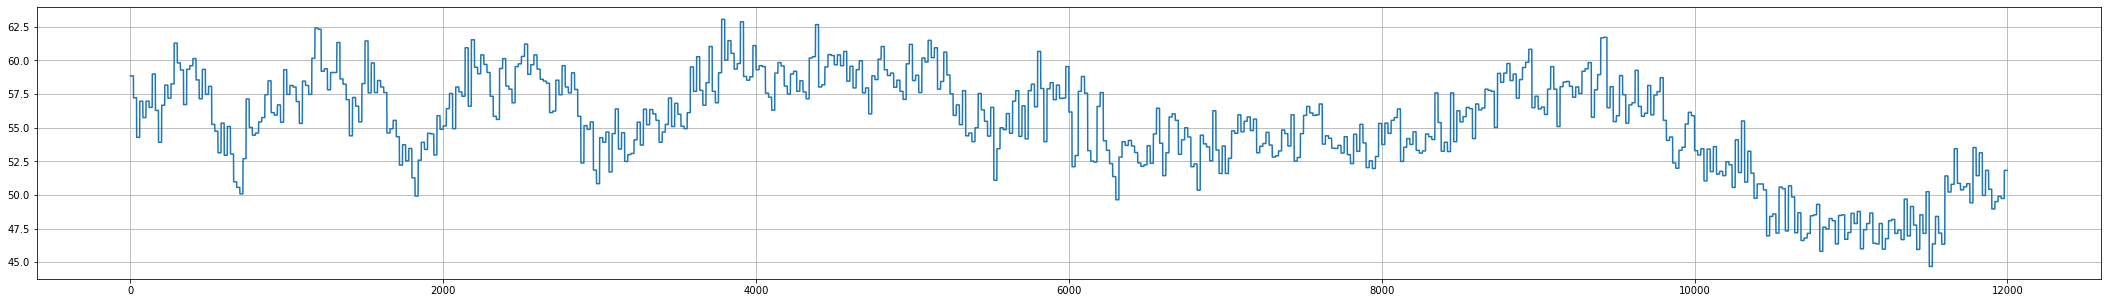

In [134]:
data['Vane_WD_122m'].plot(figsize=(37,5), grid=True)

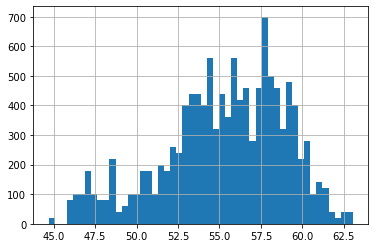

In [135]:
data['Vane_WD_122m'].hist(bins=50)

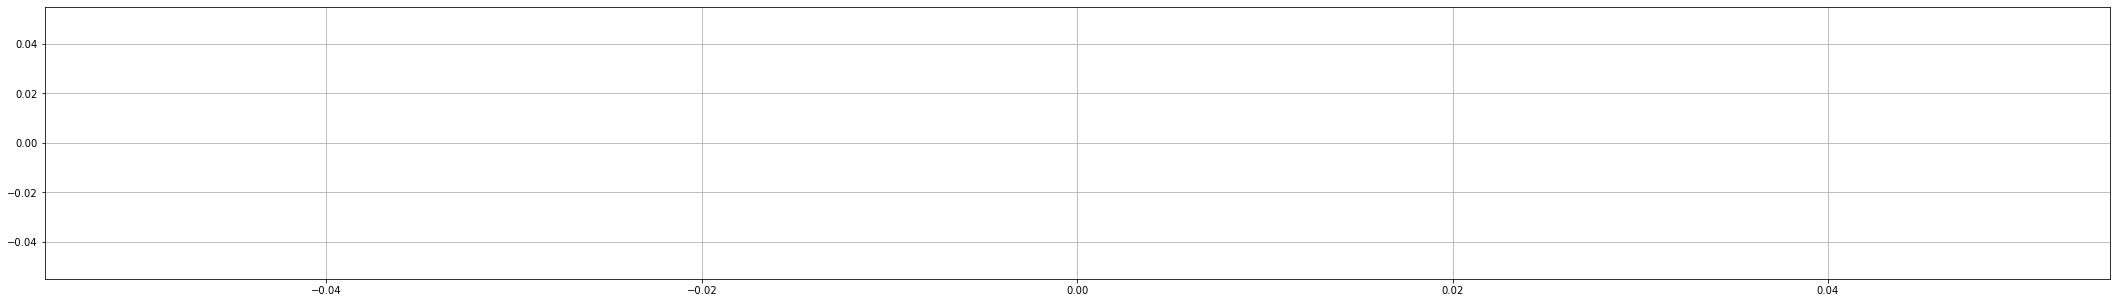

In [136]:
data['Sonic_direction_119m'].plot(figsize=(37,5), grid=True)

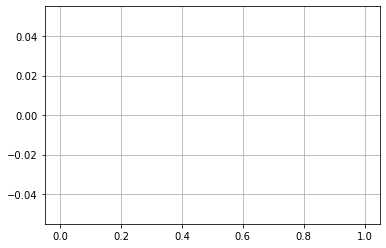

In [137]:
data['Sonic_direction_119m'].hist(bins=50)

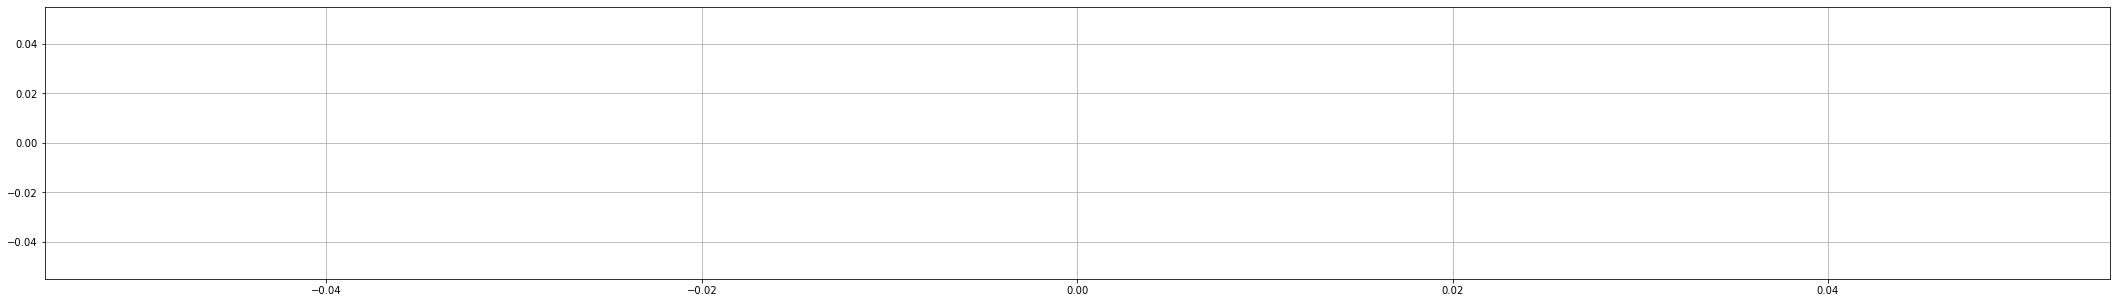

In [138]:
(data['Sonic_direction_119m'] - data['Vane_WD_122m']).plot(figsize=(37,5), grid=True)

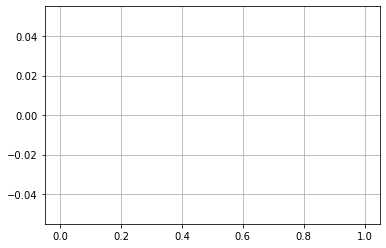

In [139]:
(data['Sonic_direction_119m'] - data['Vane_WD_122m']).hist(bins=50)

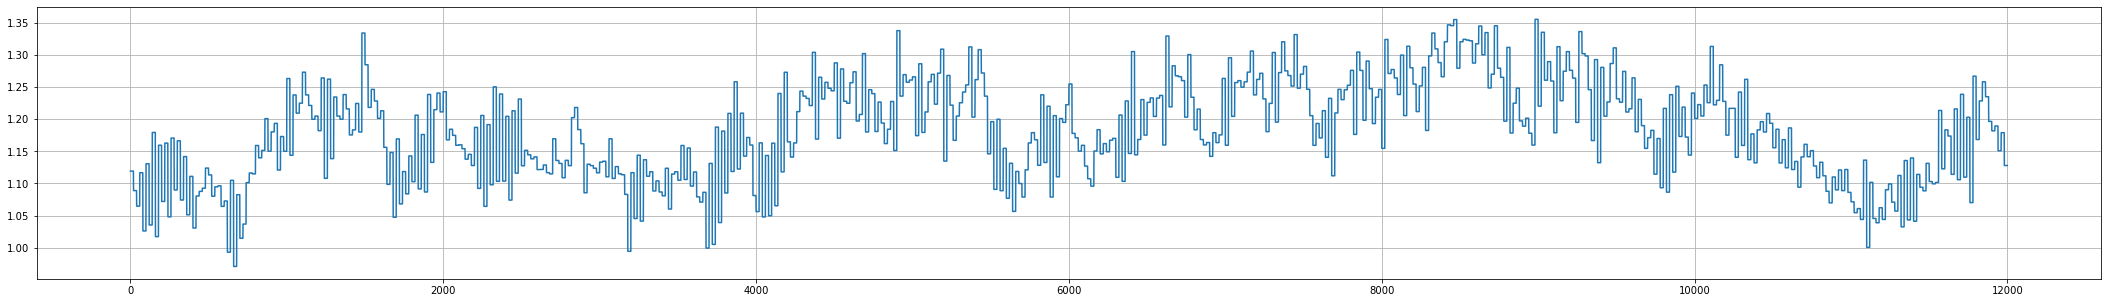

In [140]:
data['Cup_WS_122m'].plot(figsize=(37,5), grid=True)

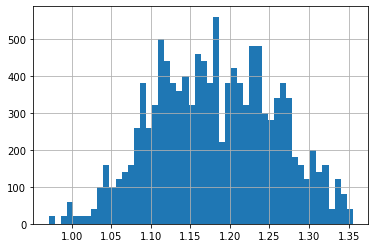

In [141]:
data['Cup_WS_122m'].hist(bins=50)

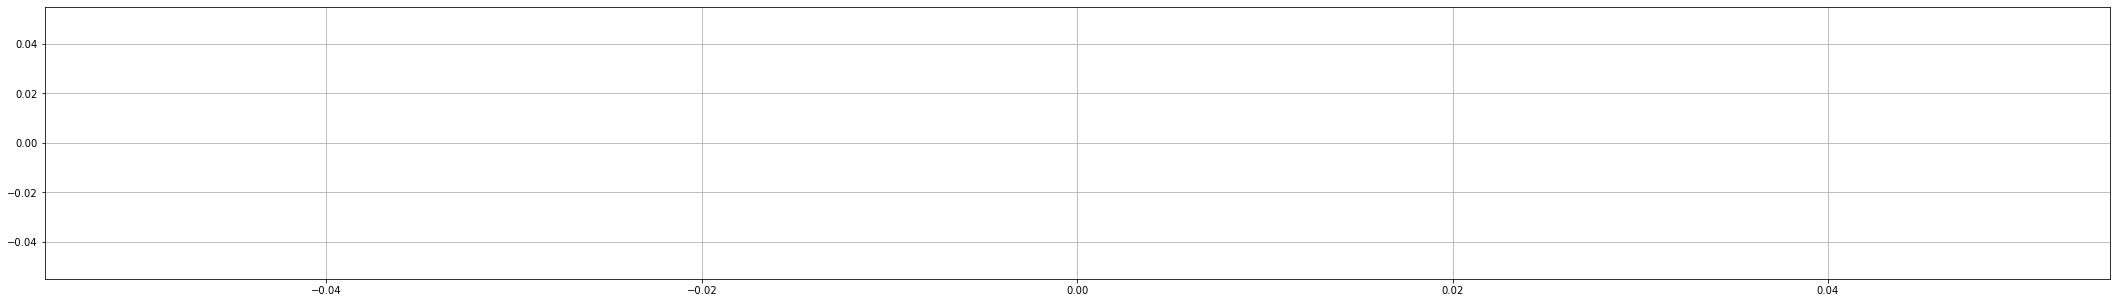

In [152]:
data['Sonic_CupEqHorizSpeed_119m'].plot(figsize=(37,5), grid=True)

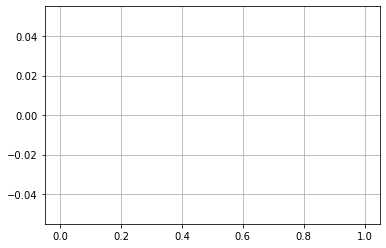

In [143]:
data['Sonic_CupEqHorizSpeed_119m'].hist(bins=50)

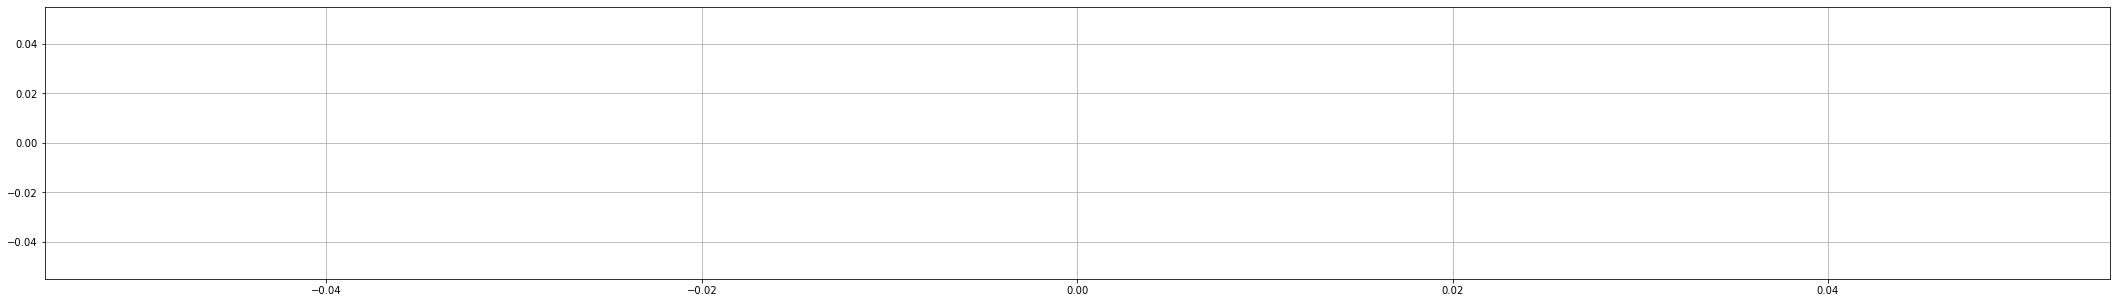

In [144]:
(data['Sonic_CupEqHorizSpeed_119m'] - data['Cup_WS_122m']).plot(figsize=(37,5), grid=True)

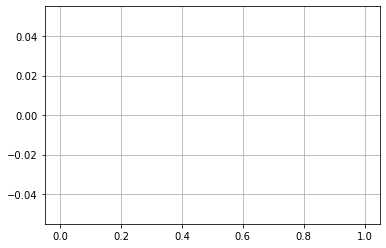

In [145]:
(data['Sonic_CupEqHorizSpeed_119m'] - data['Cup_WS_122m']).hist(bins=50)

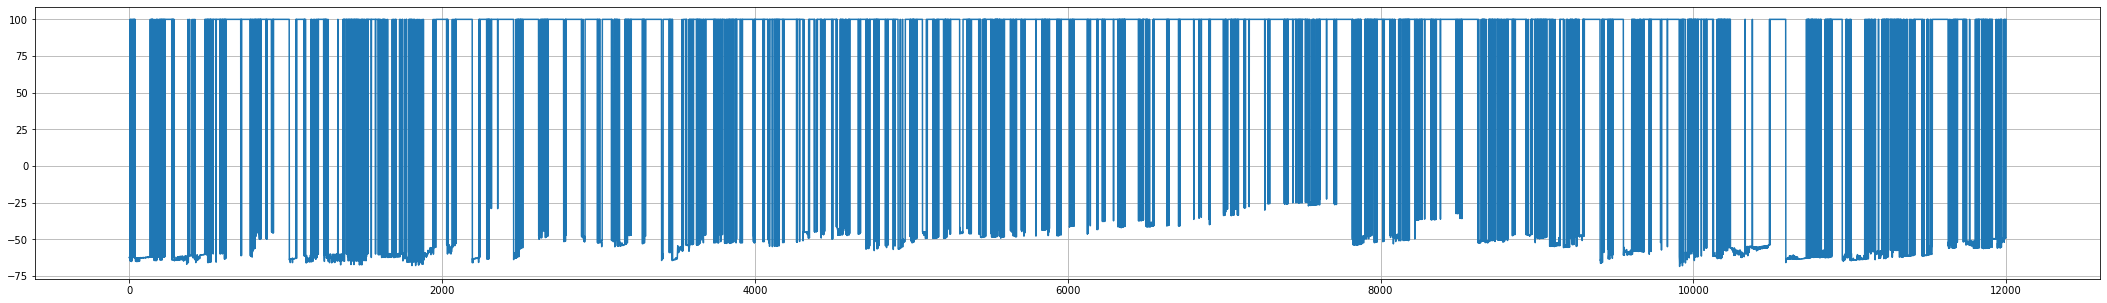

In [146]:
data['Sonic_x_119'].plot(figsize=(37,5), grid=True)

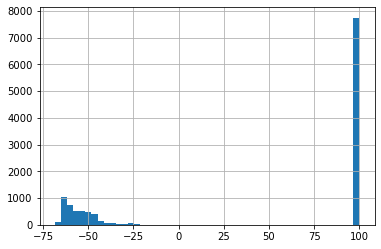

In [147]:
data['Sonic_x_119'].hist(bins=50)

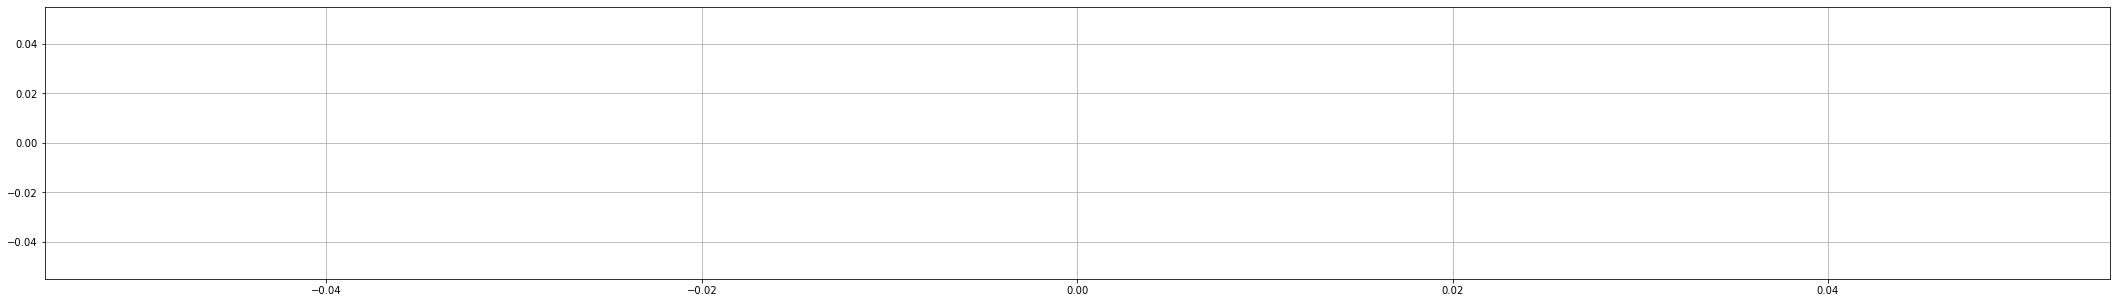

In [148]:
data['Sonic_x_clean_119m'].plot(figsize=(37,5), grid=True)

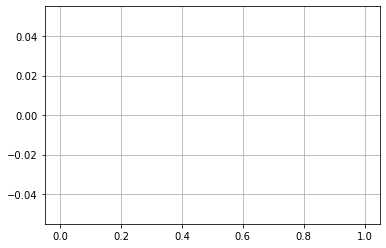

In [149]:
data['Sonic_x_clean_119m'].hist(bins=50)

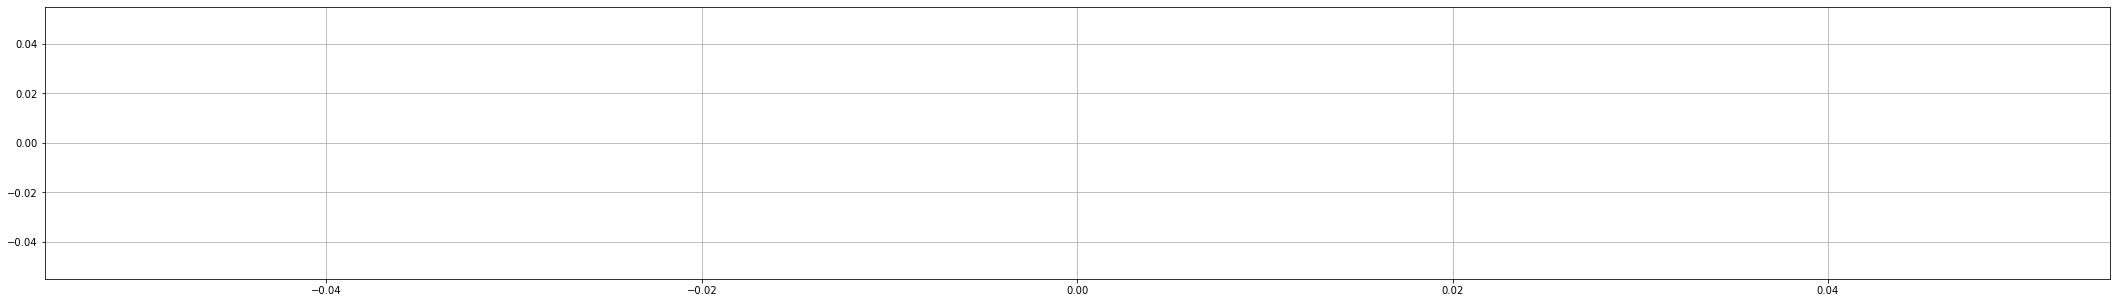

In [150]:
(data['Sonic_x_clean_119m'] - data['Sonic_x_119']).plot(figsize=(37,5), grid=True)